In [1]:
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
samples = [
    "2Mu2E_100GeV_1p2GeV_9p6mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["pvAndCosmic_cuts"]
p = sidm_processor.SidmProcessor(
    channels,
    ["photon_id"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts
Not applying any cuts to the lepton jets for channel  pvAndCosmic_cuts


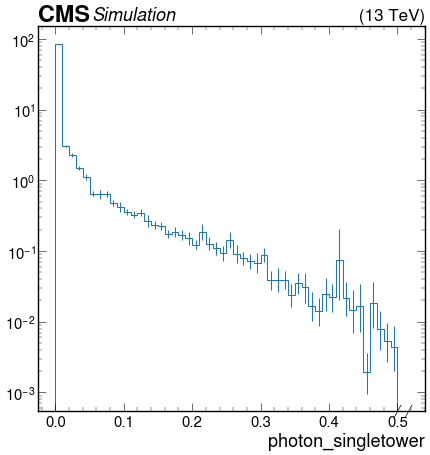

In [3]:
utilities.plot(out["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["photon_singletower"][channels[0], :], density=True)
plt.yscale('log')

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f18d58a0370>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

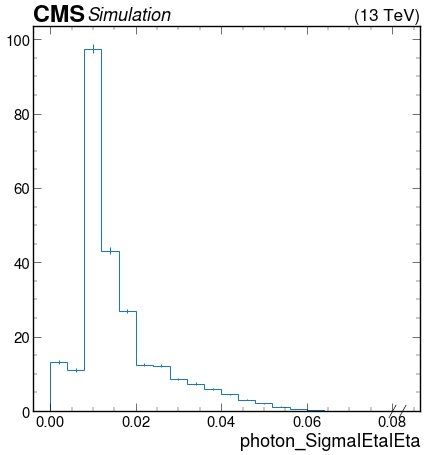

In [4]:
utilities.plot(out["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["photon_SigmaIEtaIEta"][channels[0], :], density=True)

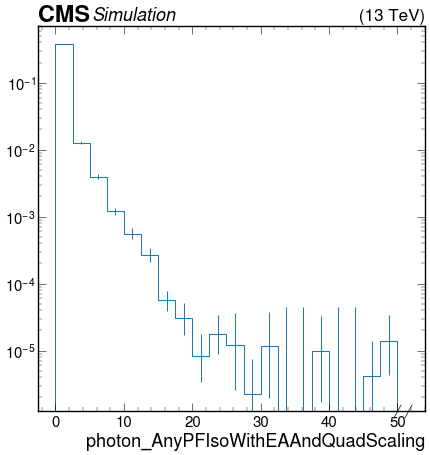

In [5]:
utilities.plot(out["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[0], :], density=True)
plt.yscale('log')

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f18d5a0b490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

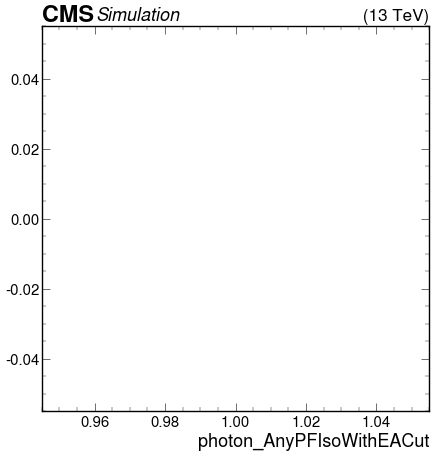

In [6]:
utilities.plot(out["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["photon_AnyPFIsoWithEACut"][channels[0], :], density=True)

AnyPFIsoWithEA doesn't work